In [2]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt


In [3]:
# GPA, GRE scores dataset

X=np.array([
[1,1.0,1.0],
[1,0.9,1.0],
[1,0.9,0.875],
[1,0.7,0.75],
[1,0.6,0.875],
[1,0.6,0.875],
[1,0.5,0.75],
[1,0.5,0.8125],
[1,0.5,1.0],
[1,0.5,0.875],
[1,0.5,0.875]])

print(X)

y=np.array([[
1,
1,
1,
-1,
-1,
1,
-1,
-1,
1,
-1,
1
]]).T;

print(y)

[[1.     1.     1.    ]
 [1.     0.9    1.    ]
 [1.     0.9    0.875 ]
 [1.     0.7    0.75  ]
 [1.     0.6    0.875 ]
 [1.     0.6    0.875 ]
 [1.     0.5    0.75  ]
 [1.     0.5    0.8125]
 [1.     0.5    1.    ]
 [1.     0.5    0.875 ]
 [1.     0.5    0.875 ]]
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [-1]
 [ 1]
 [-1]
 [ 1]]


In [21]:
w = np.ones((1,X.shape[1]))

def error(X, y, w):
    return np.log(1 + (np.exp(-y*X@w.T)))
    

In [22]:
def error_mean(X, y, w):
    return np.sum(error(X, y, w))/X.shape[0]
    
print(error_mean(X,y,w)) 

0.7975341580074141


In [23]:
def grad(X, y, w):
    return (y*X)/(1+(np.exp(y*X@w.T)))

def grad_mean(X, y, w):
    array = np.sum(grad(X, y, w), axis=0)
    return  (-1) * array/X.shape[0]

print(grad_mean(X,y,w))


[0.27833953 0.0719479  0.08469537]


[[-2.59498265  3.33917133  2.91971101]]


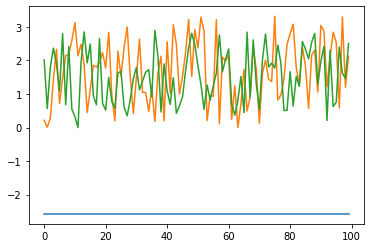

In [29]:
def fit(X,y,kappa,iter):
    w = np.zeros((1,X.shape[1]))
    E = []
    
    for i in range(iter):
        E = X * w
        w -= kappa*grad_mean(X,y,w)
    
    return w,E

w,E = fit(X,y,1,100)
print(w)
plt.plot(E)
plt.show()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('ex3data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [32]:
# we use .values to obtain the 
#underlying numpy array of the dataframe
# we use iloc in order to access parts of 
#the dataframe by using ranges; -1 is the last column
X = data.iloc[:,0:-1].values

# we normalize X
maxX = np.max(X, axis=0)
minX = np.min(X, axis=0)
X = (X-minX)/(maxX-minX)
#print( X )


# we insert an all-ones column at index 0
X = np.insert(X, 0, 1, axis=1)

#print(X)

y = data.iloc[:,-1:].values 


#we build a boolean index
where_are_zeros = (y==0)
y[where_are_zeros] = -1

#print(y)

# uncomment the above printouts to see what's going one

In [33]:
def prepare(data):
    X = data.iloc[:,0:-1].values

    # we normalize X
    maxX = np.max(X, axis=0)
    minX = np.min(X, axis=0)
    X = (X-minX)/(maxX-minX)

    # we insert an all-ones column at index 0
    X = np.insert(X, 0, 1, axis=1)

    y = data.iloc[:,-1:].values 

    where_are_zeros = (y==0)
    y[where_are_zeros] = -1
    
    return X,y


X,y = prepare(data)
print(X)
print(y)

[[1.         0.06542784 0.69465488]
 [1.         0.00326632 0.19470455]
 [1.         0.08296784 0.61961779]
 [1.         0.43176427 0.81600135]
 [1.         0.7019434  0.65539214]
 [1.         0.2153456  0.37665959]
 [1.         0.44500891 0.96545859]
 [1.         0.64449684 0.23365526]
 [1.         0.65989108 0.83229079]
 [1.         0.77934283 0.18940757]
 [1.         0.94315096 0.11165142]
 [1.         0.64433793 0.        ]
 [1.         0.74887421 0.67205614]
 [1.         0.56336978 0.98314328]
 [1.         0.13586997 0.6655353 ]
 [1.         0.34273413 0.85846452]
 [1.         0.55914951 0.32427783]
 [1.         0.5430494  0.23547989]
 [1.         0.58195856 0.91295399]
 [1.         0.67250409 0.24862534]
 [1.         0.53481039 0.17922749]
 [1.         0.85450448 0.51557164]
 [1.         0.29348214 0.26737325]
 [1.         0.05952839 0.19931197]
 [1.         0.68605319 0.56205138]
 [1.         0.46169753 0.57643769]
 [1.         0.71853306 0.20827835]
 [1.         0.90377581 0.12

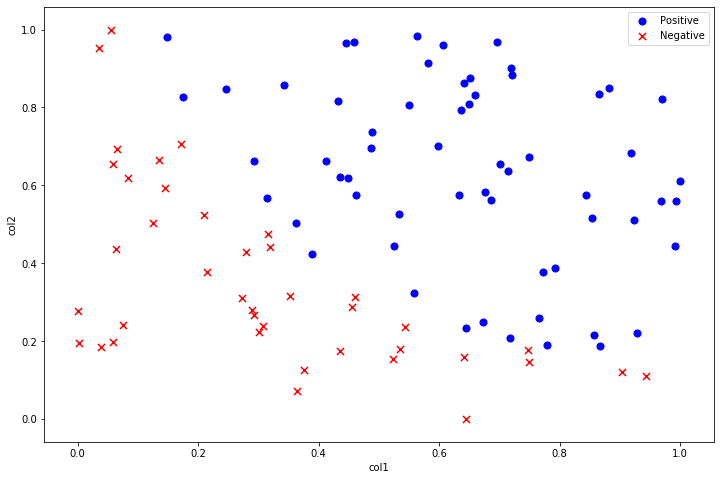

In [34]:
def visualize(X, y, col1=1, col2=2):
    positive_indexes = np.where(y == 1)[0]  #only the first element of the result is needed, i.e. we do [0]
    negative_indexes = np.where(y == -1)[0]

    positive = X[positive_indexes]  # positive rows
    negative = X[negative_indexes]  # negative rows

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positive[:,1:2], positive[:,2:], s=50, c='b', marker='o', label='Positive')
    ax.scatter(negative[:,1:2], negative[:,2:], s=50, c='r', marker='x', label='Negative')
    ax.legend()
    ax.set_xlabel('col' + str(col1))
    ax.set_ylabel('col' + str(col2))

    plt.show()
    

visualize(X,y)

[[-8.18922472  9.35074421  8.77019163]]


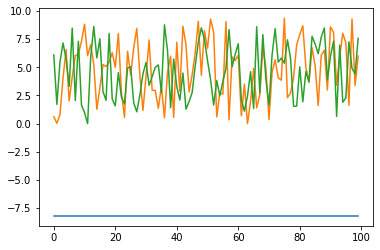

In [35]:
w,E = fit(X,y,1,1000)
print(w)
plt.plot(E)
plt.show()

In [93]:
import collections
def predict(w, X):
    z = np.dot(X, w.T)
    val = (1/(1+np.exp(-z)))  
    return val

def accuracy(y, y_pred):
    #print(y_pred)
    arr = []
    for j in y_pred:
        if j >= .5:
            arr.append(1)
        else:
            arr.append(0)
    y = np.array(arr)
    num_zeros = (y == 0).sum()
    num_ones = (y == 1).sum()
    print(num_zeros)
    print(num_ones)
    
    
    #acc = np.mean(y_pred-y/y+y_pred)

y_pred = predict(w, X)
print(accuracy(y, y_pred))

39
61
None


In [19]:
def split_train_test(X,y,pct=80):
    n = X.shape[0]
    s = round(n * pct / 100)
    
    indices = np.random.permutation(n)
    train_idx, test_idx = indices[:s], indices[s:]
    
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx,:], y[test_idx,:]
    
    return X_train, y_train, X_test, y_test

[[-8.34590935  9.00870113  9.16183597]]


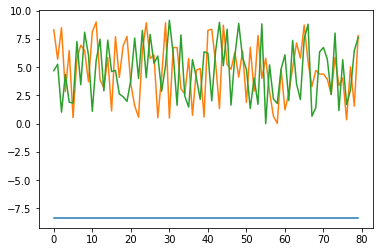

0.5783499454569265


In [20]:
X_train, y_train, X_test, y_test = split_train_test(X,y,pct=80)
w,E = fit(X_train,y_train,1,1000)
print(w)
plt.plot(E)
plt.show()
y_pred = predict(w,X_test)
print( accuracy(y_test,y_pred) )